# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [81]:
#See data details for mouse data:
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [82]:
#See data details for study data:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [89]:
# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [90]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Checking the number of mice.
combined_data_df.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
g989      0          45.000000           0                 Propriva      Female  21          26            2
a203      0          45.000000           0                 Infubinol     Female  20          23            1
q597      40         44.471821           2                 Ramicane      Male    20          25            1
q633      10         49.001866           0                 Zoniferol     Male    12          25            1
          5          47.183802           0                 Zoniferol     Male    12          25            1
                                                                                                          ..
i177      45         33.562402           3                 Ramicane      Male    10          18            1
          40         35.557933           2                 Ramicane      Male    10          18            1
          35         35.

In [ ]:
#Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#TO DO
#duplicated_mouse_ID = clean_data_df.loc[duplicated_mouse, 'Mouse ID', "Timepoint"].unique()


In [91]:
#Clean DF to only show unique Mouse ID's
index_df=combined_data_df.set_index('Mouse ID')
index_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [96]:
#Reset index
clean_data_df =index_df.drop(['g989'])
clean_data_df.count()
clean_data_df = clean_data_df.reset_index()
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [97]:
# Checking the number of mice in the clean DataFrame.
#ERROR TO FIX AS ANSWER IS 248

clean_data_df.count()

Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

In [94]:
#CHECK IF THERE ARE MISSING REQUIREMENTS IN ORIGINAL STARTER CODE
c

NameError: name 'c' is not defined

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_table = clean_data_df.groupby(['Drug Regimen'])
#drug_regimen_table.head()
#Combine all statistics computation together
tumor_mean = drug_regimen_table['Tumor Volume (mm3)'].mean()
tumor_median = drug_regimen_table['Tumor Volume (mm3)'].median()
tumor_variance = drug_regimen_table['Tumor Volume (mm3)'].var()
tumor_standard_deviation = drug_regimen_table['Tumor Volume (mm3)'].std()
tumor_sem = drug_regimen_table ['Tumor Volume (mm3)'].sem()

summary_tumor_table =pd.DataFrame({
    'Mean': tumor_mean,
    'Median': tumor_median,
    'Variance': tumor_variance,
    'Standard Deviation': tumor_standard_deviation,
    'SEM': tumor_sem
})
summary_tumor_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
#SHOULD LOOK LIKE THIS
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#OR THIS
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

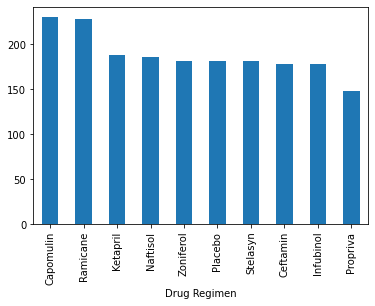

In [108]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_regimen = clean_data_df.groupby(["Drug Regimen"])['Timepoint'].count()
mice_per_regimen.sort_values(ascending=False).plot.bar()
#HOW DO WE ADD Y LABLE?


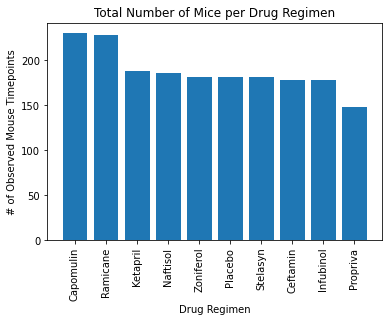

In [110]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar_mice_per_regimen = mice_per_regimen.sort_values(ascending=False)
plt.bar(pyplot_bar_mice_per_regimen.index,pyplot_bar_mice_per_regimen.values)
plt.title("Total Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.show()

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate number of mice for each sex
sex_mice = clean_data_df.groupby(['Sex'])['Sex'].count()
sex_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

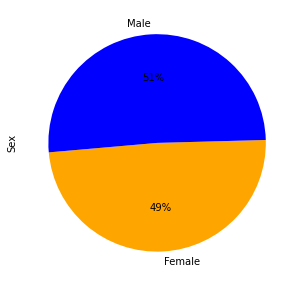

In [127]:
#Plot pie chart
#CLOURS SHOULD BE THE OTHER WAY AROUND
sex_mice.plot.pie(startangle=185,autopct='%1.0f%%', figsize=(5,5),colors=('orange','blue'))


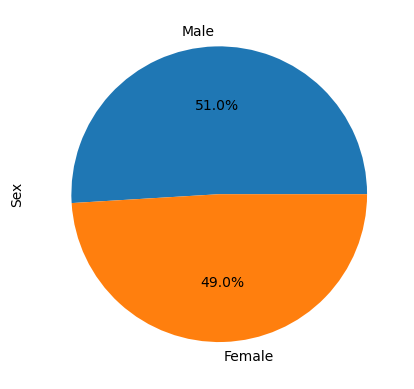

In [11]:
#SHOULD LOOK LIKE THIS:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [123]:
sex_mice_pyplot_df=pd.DataFrame(sex_mice)
sex_mice_pyplot_df

,Sex
Sex,
Female,922
Male,958


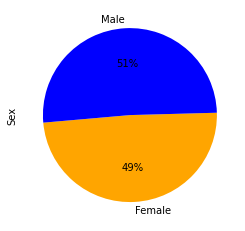

In [128]:


plt.pie(sex_mice, labels=('Female','Male'), startangle=185, autopct='%1.0f%%',colors=('orange','blue'))
plt.ylabel('Sex')
plt.show()

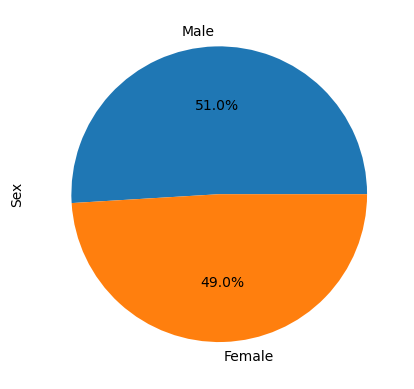

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_mice,labels=('female','male') startangle=185,autopct='%1.1f%%',shadow=True,colors=('blue','orange'))
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [138]:
#CHECK IF THE BELOW IS CORRECT
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df =pd.merge(clean_data_df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [139]:
#As above


In [141]:
# Put treatments into a list for for loop (and later for plot labels)
final_tumor_data =clean_data_df.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint','Tumor Volume (mm3)']]
final_tumor_df =final_tumor_data.reset_index()

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
        # Locate the rows which contain mice on each drug and get the tumor volumes
        final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
        # add subset 
        final_tumor_vol_list.append(final_tumor_vol)
        # Determine outliers using upper and lower boundstreatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
        quartiles = final_tumor_vol.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        mean = final_tumor_vol.mean()
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)

        outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

        print(f"{drug} Regmen")
        print(f"Final tumour volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
        print(f"Final tumour volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
        print(f"Average tumour volume(mm3) for {drug} is {round(mean,2)}.")
        print(f"Number of outliers for Capomulin is: {outliers.count()}.")
        if outliers.count() > 0:
                for i in outliers.index:
                        print(f'Outlier final tumour volume(mm3) is {round(outliers[i], 2)}.')
   

Capomulin Regmen
Final tumour volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumour volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumour volume(mm3) for Capomulin is 36.67.
Number of outliers for Capomulin is: 0.
Ramicane Regmen
Final tumour volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumour volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumour volume(mm3) for Ramicane is 36.19.
Number of outliers for Capomulin is: 0.
Infubinol Regmen
Final tumour volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumour volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumour volume(mm3) for Infubinol is 58.18.
Number of outliers for Capomulin is: 1.
Outlier final tumour volume(mm3) is 36.32.
Ceftamin Regmen
Final tumour volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumour volume(mm3) for Ceftamin above 87.67 could be outliers.
Average tumour volume(mm3) for Ceftamin is 57.75.
Number of outl

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


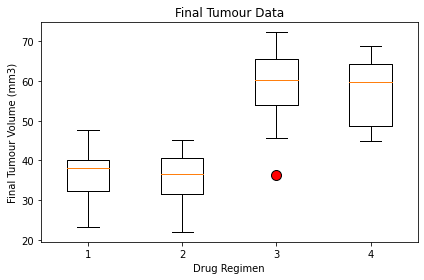

In [152]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#MISSING DRUG LABLES ON X AXIS
fig1, final_tumor_plot =plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, flierprops={'markerfacecolor':'r', 'markersize' :10})

final_tumor_plot.set_title("Final Tumour Data")
final_tumor_plot.set_xlabel("Drug Regimen")
final_tumor_plot.set_ylabel("Final Tumour Volume (mm3)")

plt.tight_layout()
final_tumor_plot.figure.savefig("Final Tumour Data.png")
plt.show()
plt.close()

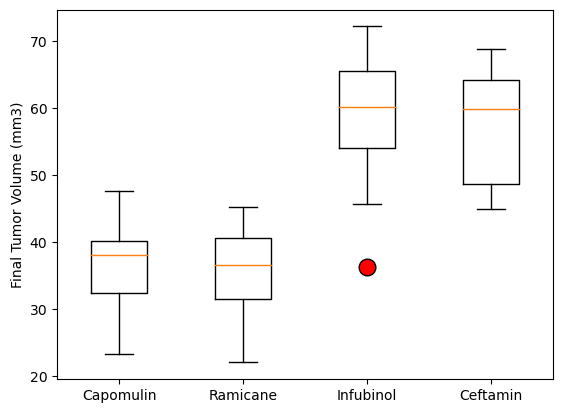

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [159]:

#NOT COMING RIGHT
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
mouse_id = '1509'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumour Volume (mm3)'], marker='*')

plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

plt.tight_layout()
plt.savefig(f"Images/{mouse_id}_tumor_vol.png")

plt.show()
plt.close()


KeyError: 'Tumour Volume (mm3)'

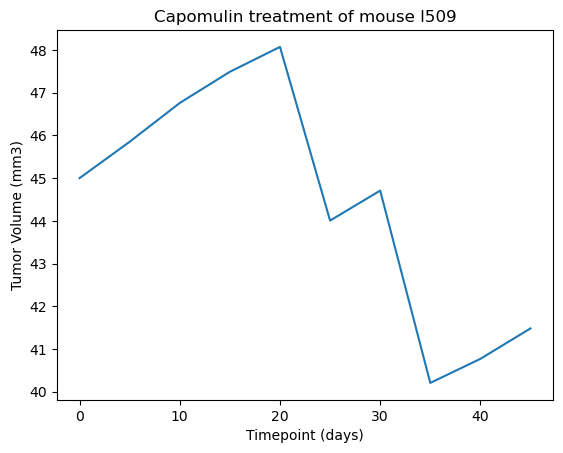

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


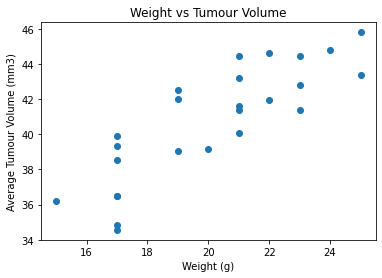

In [162]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_gp = capomulin_df.groupby(["Mouse ID"]).mean()
mice_weight_avg = capomulin_gp['Weight (g)']
mice_tumor_avg = capomulin_gp['Tumor Volume (mm3)']

plt.scatter(mice_weight_avg, mice_tumor_avg)

plt.title('Weight vs Tumour Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')

plt.savefig('Weight vs Tumour Volume.png')
plt.show()
plt.close()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


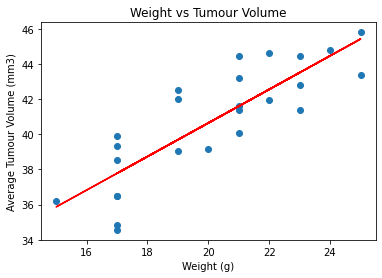

In [165]:
# Calculate the correlation coefficient and a linear regression model 
x_values = mice_weight_avg
y_values = mice_tumor_avg
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(x_values,y_values)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

r_squared = round(rvalue**2,2)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

#Repeating the plot as per above:
plt.scatter(mice_weight_avg, mice_tumor_avg)

plt.title('Weight vs Tumour Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')

plt.savefig('Weight vs Tumour Volume.png')
plt.show()
plt.close()